In [ ]:
!unzip archive.zip
#https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Archive:  archive.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 


# understanding about problem statement
# understanding about different columns
# cleaning the data - finding missing values, human errors
# EDA (graphs) -  find the relationships between features.
# Outlier treatments, Imputations, removing non-essential variables
# converting data in to a certain format for model - feature scaling
# Model Building
# Model Training 
# Model Evaluation


In [1]:
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [2]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
data.drop(["time"], axis=1, inplace=True)

In [8]:
#Q1-1.5*(Q3-Q1) 23
#Q3+1.5*(Q3-Q1) 56


In [9]:
from collections import Counter
import numpy as np
def find_outlier(data, features):
  outlier_rows = []
  for col in features:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1

    outlier_val = data[(data[col] < Q1 - (1.5 * IQR)) |  (data[col] > Q3 + (1.5 * IQR))].index
    outlier_rows.extend(outlier_val)
  
  outlier_rows = Counter(outlier_rows)
  return list(k for k,v in outlier_rows.items() if v>1)
outlierrows = find_outlier(data, ["platelets", "creatinine_phosphokinase", "age", "ejection_fraction", "serum_creatinine", "serum_sodium"])
outlierrows


[117, 163, 167, 200, 281, 296, 38, 52, 217, 4]

In [10]:
data = data.drop(outlierrows, axis=0).reset_index(drop=True)

In [11]:
data.skew(axis=0)

age                         0.416002
anaemia                     0.288134
creatinine_phosphokinase    4.852619
diabetes                    0.360442
ejection_fraction           0.548999
high_blood_pressure         0.587010
platelets                   1.437016
serum_creatinine            4.629680
serum_sodium               -0.859915
sex                        -0.666976
smoking                     0.733054
DEATH_EVENT                 0.801297
dtype: float64

In [12]:
data["serum_creatinine"] = data["serum_creatinine"].map(lambda i:np.log(i))

In [13]:
data["creatinine_phosphokinase"] = data["creatinine_phosphokinase"].map(lambda i:np.log(i))

In [14]:
data.skew(axis=0)

age                         0.416002
anaemia                     0.288134
creatinine_phosphokinase    0.416232
diabetes                    0.360442
ejection_fraction           0.548999
high_blood_pressure         0.587010
platelets                   1.437016
serum_creatinine            1.509754
serum_sodium               -0.859915
sex                        -0.666976
smoking                     0.733054
DEATH_EVENT                 0.801297
dtype: float64

In [15]:
#age - 0-110
def clean_age_column(age):
  if age >= 0 and age<=110:
    return age
  else:
    return np.nan

data["age"] = data["age"].apply(clean_age_column)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


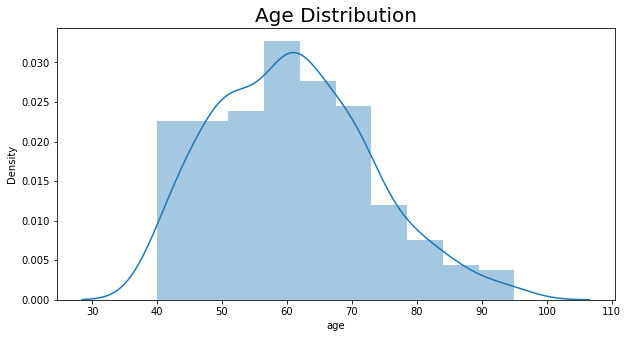

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(data["age"])
plt.title("Age Distribution", fontsize=20)
plt.show()

In [17]:
data["sex"].unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


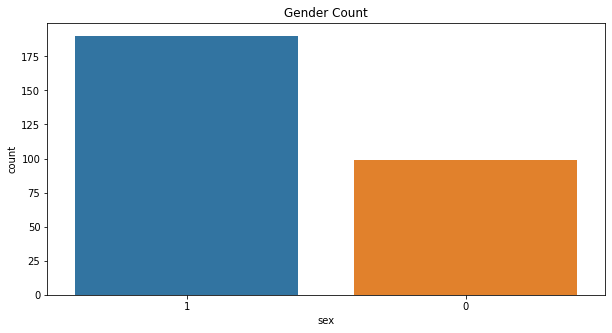

In [18]:
plt.figure(figsize=(10,5))
sns.countplot("sex", data=data,order=data["sex"].value_counts().index)
plt.title("Gender Count")
plt.show()

In [19]:
#piechart
data["smoking"].unique()


array([0, 1])

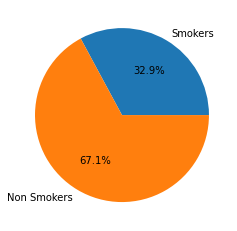

In [20]:
smoker = len(data[data.smoking == 1].index)
non_smokers = len(data[data.smoking == 0].index)
plt.pie([smoker, non_smokers], labels=["Smokers", "Non Smokers"], autopct="%1.1f%%")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


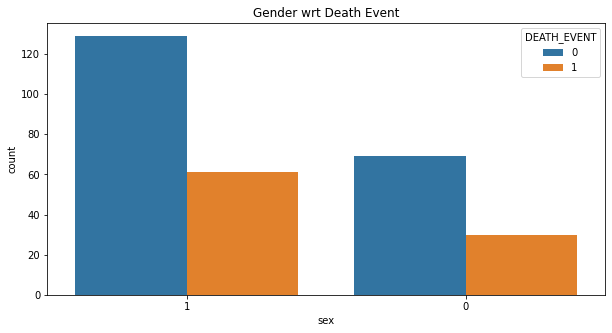

In [21]:
plt.figure(figsize=(10,5))
sns.countplot("sex", data=data,order=data["sex"].value_counts().index, hue="DEATH_EVENT")
plt.title("Gender wrt Death Event")
plt.show()

In [22]:
#high bp and gender 
import plotly.graph_objects as go
normal_bp = data[data["high_blood_pressure"]==0 & (data.sex==1)]
high_bp = data[data["high_blood_pressure"]==1 & (data.sex==1)]
labels= ["Normal bp", "High bp"]
values = [len(normal_bp), len(high_bp)]
colors = [""]
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(template="plotly_dark")

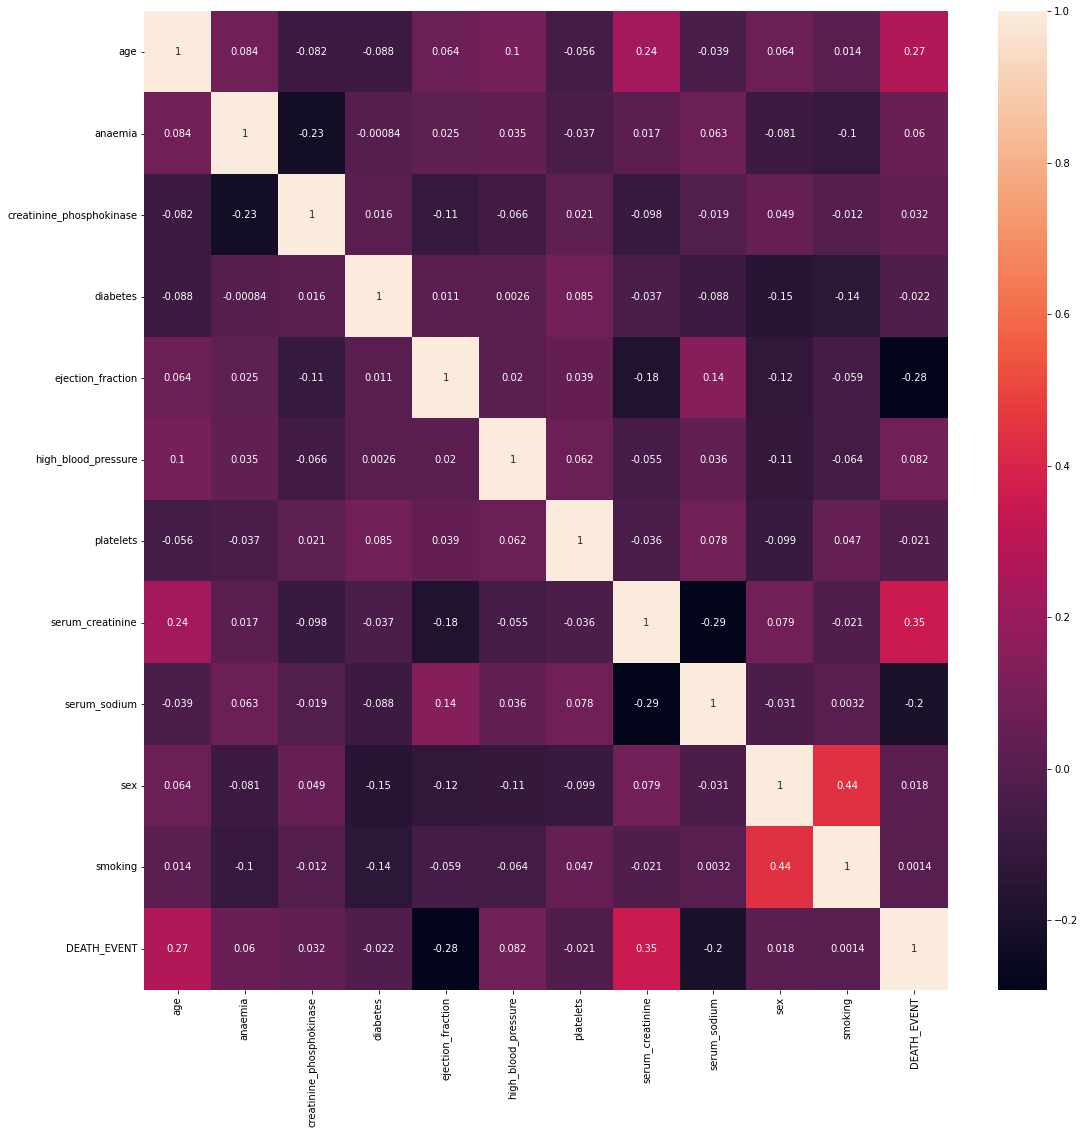

In [23]:
#heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [24]:
corr =data.corr()["DEATH_EVENT"]
corr[np.argsort(corr, axis =0)[::-1]]

DEATH_EVENT                 1.000000
serum_creatinine            0.353916
age                         0.273539
high_blood_pressure         0.081530
anaemia                     0.059531
creatinine_phosphokinase    0.032002
sex                         0.018414
smoking                     0.001372
platelets                  -0.021396
diabetes                   -0.022261
serum_sodium               -0.198537
ejection_fraction          -0.284616
Name: DEATH_EVENT, dtype: float64

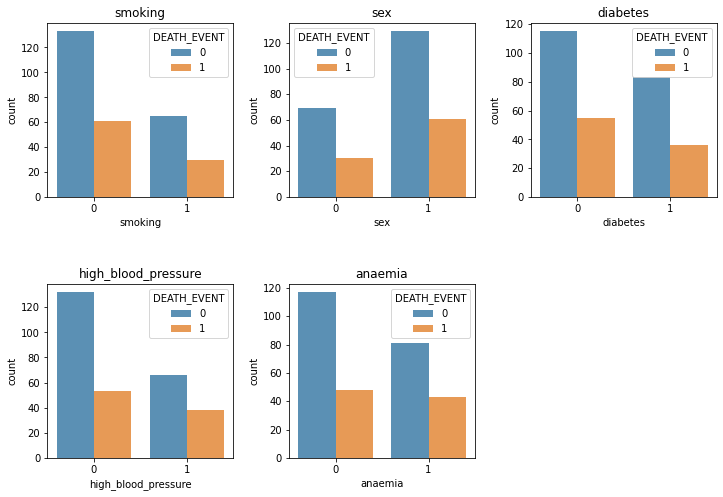

In [25]:
#categorical wrt death event
plt.figure(figsize=(12,8))
qualitative_columns = ["smoking", "sex", "diabetes", "high_blood_pressure", "anaemia"]
target_column = "DEATH_EVENT"
for i, col in enumerate(qualitative_columns):
  plt.subplot(2, 3, i+1)
  plt.title(col)
  plt.subplots_adjust(hspace=.5, wspace=.3)
  sns.countplot(data=data, x=col, hue=target_column, alpha=0.8,linewidth=1)
plt.show()


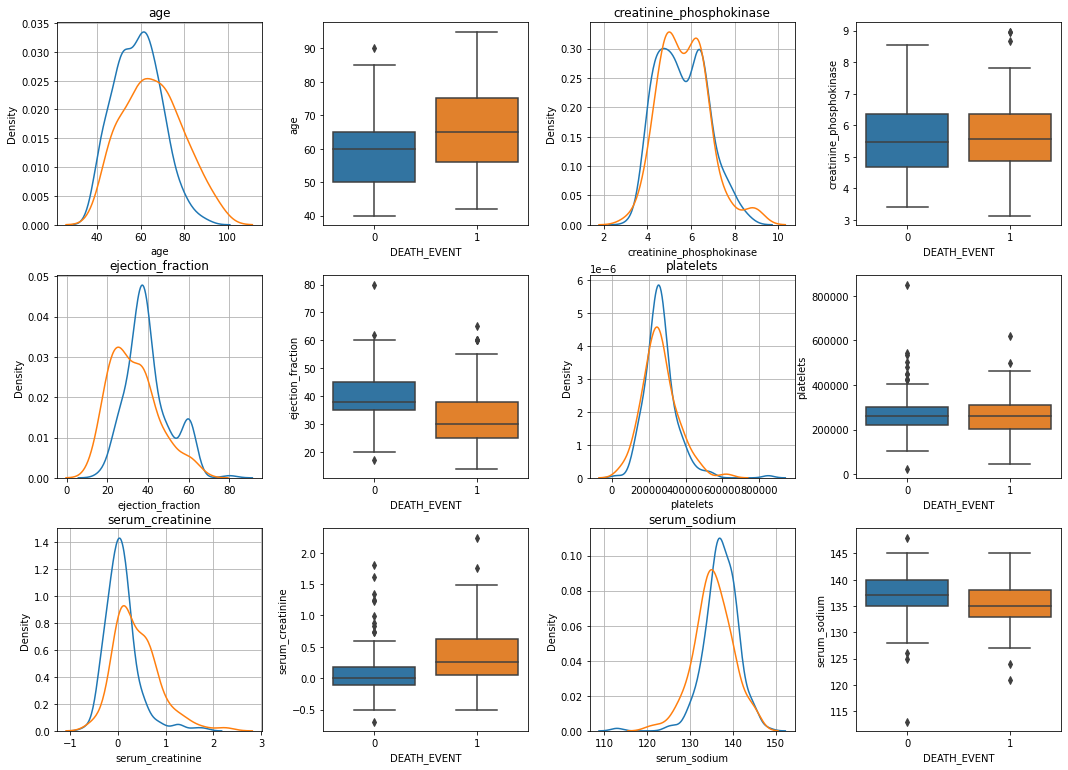

In [26]:
#quantative wrt death event
target_column = "DEATH_EVENT"
plt.figure(figsize=(18, 27))
quantative_colums = ["age", "creatinine_phosphokinase", "ejection_fraction","platelets", "serum_creatinine", "serum_sodium"]
for i, col in enumerate(quantative_colums):
  plt.subplot(6, 4, i*2+1)
  plt.subplots_adjust(hspace=.25, wspace=.3)
  plt.grid(True)
  plt.title(col)
  sns.kdeplot(data.loc[data[target_column]==0, col], label="alive")
  sns.kdeplot(data.loc[data[target_column]==1, col], label="dead")
  plt.subplot(6,4,i*2+2)
  sns.boxplot(y=col, data=data, x=target_column)


In [ ]:
# train, test 
#80, 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']], data["DEATH_EVENT"],
       test_size=0.2
       )
X_train.shape

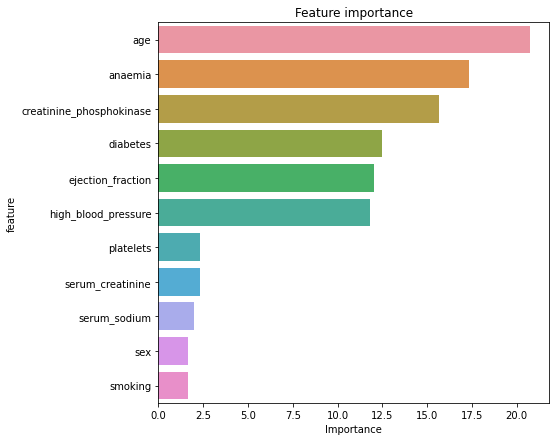

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
feature_importance = pd.DataFrame(rf.feature_importances_)
feature_importance = (feature_importance*100).sort_values(by=0, ascending=False)
feature_importance.index = pd.Series(X_train.columns)
feature_importance = feature_importance.reset_index()
feature_importance.columns = ["feature", "Importance"]
fig = plt.figure(figsize=(7,7))
ax1 = sns.barplot(data=feature_importance, x="Importance", y ="feature")
plt.title("Feature importance")
plt.show()


In [31]:

#mean, median, mode
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(data[["age"]])
data["age"] = imputer.transform(data[["age"]])
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [32]:
#smote - synethic minority oversampling technique

In [33]:
data["DEATH_EVENT"].value_counts()

0    198
1     91
Name: DEATH_EVENT, dtype: int64

In [34]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [36]:
y_train.shape

(231,)

In [35]:
one = y_train[y_train==1]
one.shape

(72,)

In [37]:
X_test.shape

(58, 11)

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote.shape

(318, 11)

In [39]:
one = y_smote[y_smote==1]
one.shape

(159,)

In [51]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_smote)
X_minmax = pd.DataFrame(X_minmax, columns =['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'])
X_minmax

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.818182,0.0,0.380704,0.0,0.363636,0.0,0.173101,0.234980,0.657143,1.0,0.0
1,0.181818,0.0,0.288779,1.0,0.242424,1.0,0.132005,0.349986,0.657143,0.0,1.0
2,0.454545,0.0,0.487368,1.0,0.166667,0.0,0.271482,0.349986,0.657143,1.0,1.0
3,0.090909,0.0,0.553802,0.0,1.000000,0.0,0.269437,0.343267,0.685714,0.0,0.0
4,0.127273,0.0,0.553802,0.0,0.166667,0.0,0.103362,0.187894,0.600000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
313,0.671930,1.0,0.628198,0.0,0.348485,1.0,0.351899,0.384094,0.800000,0.0,0.0
314,0.275630,0.0,0.471583,0.0,0.348485,0.0,0.212774,0.591212,0.514286,0.0,0.0
315,0.381428,0.0,0.363814,1.0,0.272727,0.0,0.315673,0.483412,0.628571,0.0,0.0
316,0.494098,0.0,0.144764,0.0,0.136364,0.0,0.193892,0.204790,0.657143,1.0,1.0


In [41]:
X_minmax.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
dtype: int64

In [52]:
#gradient
#svc
#decision 

rf = RandomForestClassifier()
#random search cv vs grid search cv
params = {"n_estimators": [500, 1000,5000, 8000],
          "max_depth": [3,5,10, 20],
          'min_samples_split':[80,100],
         'min_samples_leaf':[40,50]}
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator= rf, param_distributions=params)
random.fit(X_minmax, y_smote)
print(random.best_score_)

0.7514880952380952


In [53]:
from sklearn.metrics import classification_report
model = random.best_estimator_
prediction = model.predict(X_test)
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.76      0.90      0.82        39\n           1       0.67      0.42      0.52        19\n\n    accuracy                           0.74        58\n   macro avg       0.71      0.66      0.67        58\nweighted avg       0.73      0.74      0.72        58\n'

In [54]:

from sklearn.metrics import classification_report
model = random.best_estimator_
prediction = model.predict(X_test)
classification_report(y_test, prediction)


'              precision    recall  f1-score   support\n\n           0       0.76      0.90      0.82        39\n           1       0.67      0.42      0.52        19\n\n    accuracy                           0.74        58\n   macro avg       0.71      0.66      0.67        58\nweighted avg       0.73      0.74      0.72        58\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



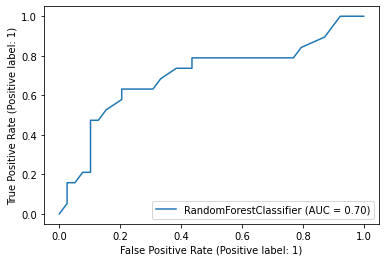

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.show()
